In [1]:
import pandas as pd
import os
os.chdir("/home/piai/문서/빅데이터프로젝트")
os.getcwd()

'/home/piai/문서/빅데이터프로젝트'

In [26]:
df = pd.read_csv("./df.csv", encoding = 'euc-kr')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

----------------

# 문화서비스 제거

In [68]:
# '대분류'에서 '문화/서비스'인 행만 제거
df = df[df['대분류'] != '문화/서비스']


-------------------------

# 대분류 - 식품인 경우 의사결정나무

In [ ]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import pydotplus
import warnings
warnings.filterwarnings('ignore')

os.chdir("/home/piai/문서/빅데이터프로젝트")
os.getcwd()
df = pd.read_csv("./df.csv", encoding = 'euc-kr')

In [ ]:
df = df[['목표달성여부','소요분', '가중분','대분류','중분류','월','요일','시간', '계절','시간대' ]]
df = df[df['대분류'] == '식품']
df['목표달성여부'] = df['목표달성여부'].astype(int)

df_dummy = pd.get_dummies(df[['중분류','요일','계절','시간대']])
df_new = pd.concat([df, df_dummy], axis = 1)
df_new = df_new.drop(['중분류','요일','계절','시간대','대분류'], axis = 1)

# 목표변수, 설명변수 데이터 지정
df_raw_y = df_new["목표달성여부"]
df_raw_x = df_new.drop("목표달성여부",axis = 1, inplace = False)

df_raw_y.value_counts(normalize=True)

In [ ]:
#데이터는 (train(0.6) : test(0.4))의 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

In [68]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.955
Score on test set: 0.616


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
    "max_depth": sp_randint(1, 20),
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(1, 20),
    "max_features": [1.0],
    "criterion": ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

random_dt = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=3, scoring="accuracy", random_state=42)
random_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(random_dt.best_estimator_))
print("\nbest parameter: \n{}".format(random_dt.best_params_))
print("\nbest score: \n{}".format(random_dt.best_score_.round(3)))


best estimator model: 
DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=1.0,
                       min_samples_leaf=12, min_samples_split=7,
                       random_state=42)

best parameter: 
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 1.0, 'min_samples_leaf': 12, 'min_samples_split': 7}

best score: 
0.724


In [70]:
tree_final = DecisionTreeClassifier(min_samples_leaf=12,min_samples_split=7,max_depth=2, random_state=1234,)
tree_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.724
Score on test set: 0.719


In [71]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
19,계절_겨울,0.395
3,시간,0.342
12,요일_목요일,0.263
0,소요분,0.000
16,요일_토요일,0.000
28,시간대_저녁,0.000
27,시간대_오후,0.000
26,시간대_오전,0.000
25,시간대_야간,0.000
24,시간대_아침,0.000


Text(0, 0.5, '변수')

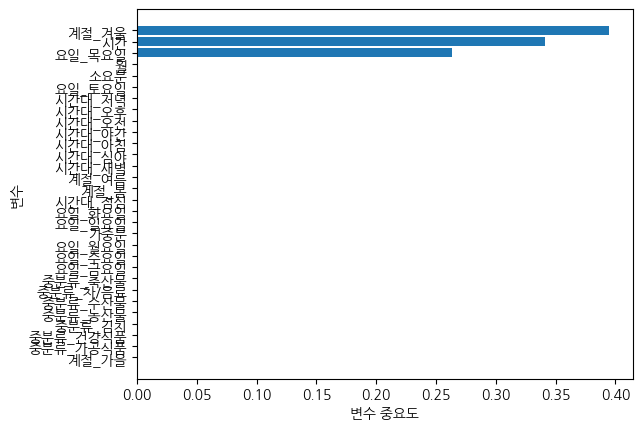

In [72]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace=True)
top_30 = df_importance.tail(30)  # 상위 50개 데이터만 선택
coordinates = range(len(top_30))
plt.barh(y=coordinates, width=top_30["importance"])
plt.yticks(coordinates, top_30["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")


_________________________________

# 대분류 - 의류일 때 랜덤포레스트

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import pydotplus
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
os.chdir("/home/piai/문서/빅데이터프로젝트")
os.getcwd()

'/home/piai/문서/빅데이터프로젝트'

In [37]:
df = pd.read_csv("./df.csv", encoding = 'euc-kr')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic' 
df.columns

Index(['의뢰ID', '상품목표주문금액', '상품순주문금액', '상품목표공헌이익금액', '상품예상취급금액', '매출액', '순매출액',
       '소요분', '가중분', '방송구분', '프로그램명', 'ARS금액', '방송시작시간', '방송종료시간', 'PD', 'SH',
       'TD', 'MD담당자명', '부서코드', '부서명', '협력사ID', '협력사명', '브랜드ID', '브랜드명', '대분류',
       '중분류', '카테고리', '요일', '요일그룹', '분기', '주', '월', '시간', '시간대', '연도', '계절',
       '목표달성율', '목표달성여부'],
      dtype='object')

In [39]:
df = df[['목표달성여부','소요분', '가중분','대분류','중분류','월','요일','시간', '계절','시간대' ]]
df = df[df['대분류'] == '의류']
df['목표달성여부'] = df['목표달성여부'].astype(int)
df.head()

,목표달성여부,소요분,가중분,대분류,중분류,월,요일,시간,계절,시간대
0,0,50.0,52.7,의류,여성의류,1,금요일,0,겨울,심야
9,0,75.0,69.5,의류,여성의류,1,금요일,6,겨울,아침
17,0,60.0,96.7,의류,여성의류,1,금요일,9,겨울,오전
40,0,69.5,74.5,의류,여성의류,1,토요일,8,겨울,아침
41,0,69.5,74.5,의류,여성의류,1,토요일,8,겨울,아침


In [44]:
df_dummy = pd.get_dummies(df[['중분류','요일','계절','시간대']])
df_new = pd.concat([df, df_dummy], axis = 1)
df_new = df_new.drop(['중분류','요일','계절','시간대','대분류'], axis = 1)

In [47]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_new["목표달성여부"]
df_raw_x = df_new.drop("목표달성여부",axis = 1, inplace = False)

df_raw_y.value_counts(normalize=True)

0    0.712889
1    0.287111
Name: 목표달성여부, dtype: float64

In [60]:
#데이터는 (train(0.6) : test(0.4))의 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)



tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.968
Score on test set: 0.603


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
    "max_depth": sp_randint(1, 20),
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(1, 20),
    "max_features": [1.0],
    "criterion": ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

random_dt = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=3, scoring="accuracy", random_state=42)
random_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(random_dt.best_estimator_))
print("\nbest parameter: \n{}".format(random_dt.best_params_))
print("\nbest score: \n{}".format(random_dt.best_score_.round(3)))


best estimator model: 
DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=1.0,
                       min_samples_leaf=12, min_samples_split=7,
                       random_state=42)

best parameter: 
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 1.0, 'min_samples_leaf': 12, 'min_samples_split': 7}

best score: 
0.706


In [62]:
tree_final = DecisionTreeClassifier(min_samples_leaf=12,min_samples_split=7,max_depth=2, random_state=1234,)
tree_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.706
Score on test set: 0.724


In [63]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
16,계절_가을,0.444
14,요일_토요일,0.281
3,시간,0.275
15,요일_화요일,0.000
26,시간대_저녁,0.000
25,시간대_오후,0.000
24,시간대_오전,0.000
23,시간대_야간,0.000
22,시간대_아침,0.000
21,시간대_심야,0.000


Text(0, 0.5, '변수')

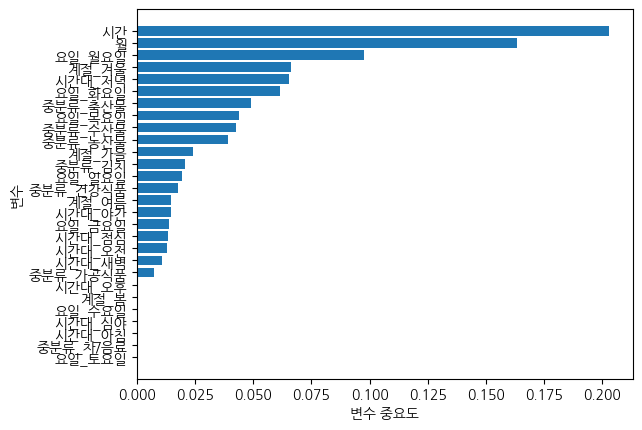

In [27]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace=True)
top_30 = df_importance.tail(30)  # 상위 50개 데이터만 선택
coordinates = range(len(top_30))
plt.barh(y=coordinates, width=top_30["importance"])
plt.yticks(coordinates, top_30["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")


---------------

# 대분류 - 식품 랜덤포레스트

In [35]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import pydotplus
import warnings
warnings.filterwarnings('ignore')

os.chdir("/home/piai/문서/빅데이터프로젝트")
os.getcwd()
df = pd.read_csv("./df.csv", encoding = 'euc-kr')

In [36]:
df = df[['목표달성여부','대분류','중분류','월','요일','시간', '계절','시간대' ]]
df = df[df['대분류'] == '식품']
df['목표달성여부'] = df['목표달성여부'].astype(int)

df_dummy = pd.get_dummies(df[['중분류','요일','계절','시간대']])
df_new = pd.concat([df, df_dummy], axis = 1)
df_new = df_new.drop(['중분류','요일','계절','시간대','대분류'], axis = 1)

# 목표변수, 설명변수 데이터 지정
df_raw_y = df_new["목표달성여부"]
df_raw_x = df_new.drop("목표달성여부",axis = 1, inplace = False)

df_raw_y.value_counts(normalize=True)

0    0.722072
1    0.277928
Name: 목표달성여부, dtype: float64

In [37]:
#데이터는 (train(0.6) : test(0.4))의 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)

rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.905
Score on test set: 0.651


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
    "n_estimators": sp_randint(100, 500),
    "max_depth": sp_randint(1, 20),
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(1, 20),
    "max_features": [1.0],
    "criterion": ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)

random_rf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, scoring="accuracy", random_state=42)
random_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(random_rf.best_estimator_))
print("\nbest parameter: \n{}".format(random_rf.best_params_))
print("\nbest score: \n{}".format(random_rf.best_score_.round(3)))


best estimator model: 
RandomForestClassifier(max_depth=4, max_features=1.0, min_samples_leaf=8,
                       min_samples_split=4, n_estimators=249, random_state=42)

best parameter: 
{'criterion': 'gini', 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 249}

best score: 
0.725


In [38]:
tree_final = RandomForestClassifier(min_samples_leaf=19,min_samples_split=12,max_depth=7, random_state=1234,)
tree_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.724
Score on test set: 0.719


Text(0, 0.5, '변수')

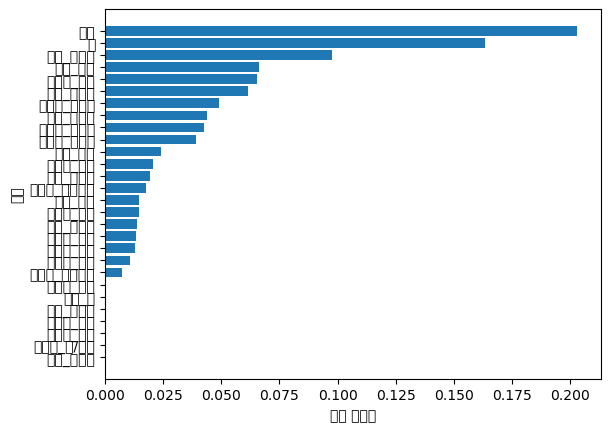

In [25]:
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)

# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace=True)
top_30 = df_importance.tail(30)  # 상위 50개 데이터만 선택
coordinates = range(len(top_30))
plt.barh(y=coordinates, width=top_30["importance"])
plt.yticks(coordinates, top_30["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

---------------

# 대분류-식품 그라디언트 부스팅

In [28]:
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [31]:
gb_uncust = GradientBoostingClassifier(random_state = 1234)
gb_uncust.fit(df_train_x, df_train_y)

print("Accuracy on train set:", gb_uncust.score(df_train_x, df_train_y), "\n")
print("Accuracy on test set: {0:.3f}\n".format(gb_uncust.score(df_test_x, df_test_y)))


Accuracy on train set: 0.7293492695883134 

Accuracy on test set: 0.716



In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
    "n_estimators": sp_randint(100, 500),
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "max_depth": sp_randint(1, 20),
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(1, 20),
    "max_features": [1.0],
    "loss": ['deviance', 'exponential']
}

gb = GradientBoostingClassifier(random_state=42)

random_gb = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=10, cv=3, scoring="accuracy", random_state=42)
random_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(random_gb.best_estimator_))
print("\nbest parameter: \n{}".format(random_gb.best_params_))
print("\nbest score: \n{}".format(random_gb.best_score_.round(3)))


best estimator model: 
GradientBoostingClassifier(loss='deviance', max_depth=2, max_features=1.0,
                           min_samples_leaf=15, min_samples_split=8,
                           n_estimators=363, random_state=42)

best parameter: 
{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'max_features': 1.0, 'min_samples_leaf': 15, 'min_samples_split': 8, 'n_estimators': 363}

best score: 
0.713


In [34]:
gb_final = GradientBoostingClassifier(min_samples_leaf=15,max_depth=2, n_estimators=363,learning_rate=0.1, random_state=1234 )

gb_final.fit(df_train_x, df_train_y)

y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Accurcy on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))


print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accurcy on training set: 0.725
Accuracy on test set: 0.717
Confusion matrix: 
[[1795    9]
 [ 701    5]]
              precision    recall  f1-score   support

           0      0.719     0.995     0.835      1804
           1      0.357     0.007     0.014       706

    accuracy                          0.717      2510
   macro avg      0.538     0.501     0.424      2510
weighted avg      0.617     0.717     0.604      2510



In [21]:
df_test_x.columns

Index(['월', '시간', '중분류_가공식품', '중분류_건강식품', '중분류_김치', '중분류_농산물', '중분류_수산물',
       '중분류_차/음료', '중분류_축산물', '요일_금요일', '요일_목요일', '요일_수요일', '요일_월요일', '요일_일요일',
       '요일_토요일', '요일_화요일', '계절_가을', '계절_겨울', '계절_봄', '계절_여름', '시간대_새벽',
       '시간대_심야', '시간대_아침', '시간대_야간', '시간대_오전', '시간대_오후', '시간대_저녁', '시간대_점심'],
      dtype='object')

# 의류 그라디언트부스팅

In [2]:
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
import os
warnings.filterwarnings('ignore')
os.chdir("/home/piai/문서/빅데이터프로젝트")
os.getcwd()
df = pd.read_csv("./df.csv", encoding = 'euc-kr')

In [3]:
df = df[['목표달성여부','대분류','중분류','월','요일','시간', '계절','시간대' ]]
df = df[df['대분류'] == '의류']
df['목표달성여부'] = df['목표달성여부'].astype(int)

df_dummy = pd.get_dummies(df[['중분류','요일','계절','시간대']])
df_new = pd.concat([df, df_dummy], axis = 1)
df_new = df_new.drop(['중분류','요일','계절','시간대','대분류'], axis = 1)

# 목표변수, 설명변수 데이터 지정
df_raw_y = df_new["목표달성여부"]
df_raw_x = df_new.drop("목표달성여부",axis = 1, inplace = False)

df_raw_y.value_counts(normalize=True)

0    0.712889
1    0.287111
Name: 목표달성여부, dtype: float64

In [5]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)


In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
    "n_estimators": sp_randint(100, 500),
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "max_depth": sp_randint(1, 20),
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(1, 20),
    "max_features": [1.0],
    "loss": ['deviance', 'exponential']
}

gb = GradientBoostingClassifier(random_state=42)

random_gb = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=10, cv=3, scoring="accuracy", random_state=42)
random_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(random_gb.best_estimator_))
print("\nbest parameter: \n{}".format(random_gb.best_params_))
print("\nbest score: \n{}".format(random_gb.best_score_.round(3)))


best estimator model: 
GradientBoostingClassifier(learning_rate=0.01, loss='deviance', max_depth=19,
                           max_features=1.0, min_samples_leaf=11,
                           min_samples_split=12, n_estimators=187,
                           random_state=42)

best parameter: 
{'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 19, 'max_features': 1.0, 'min_samples_leaf': 11, 'min_samples_split': 12, 'n_estimators': 187}

best score: 
0.672


In [9]:
gb_final = GradientBoostingClassifier(min_samples_leaf=11,max_depth=19, n_estimators=187,learning_rate=0.01, random_state=1234 )

gb_final.fit(df_train_x, df_train_y)

y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Accurcy on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))


print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accurcy on training set: 0.784
Accuracy on test set: 0.667
Confusion matrix: 
[[424  50]
 [168  13]]
              precision    recall  f1-score   support

           0      0.716     0.895     0.795       474
           1      0.206     0.072     0.107       181

    accuracy                          0.667       655
   macro avg      0.461     0.483     0.451       655
weighted avg      0.575     0.667     0.605       655



In [16]:
df_test_x.columns

Index(['월', '시간', '중분류_UNISEX류', '중분류_남성의류', '중분류_애견의류', '중분류_여성의류',
       '중분류_유아의류', '요일_금요일', '요일_목요일', '요일_수요일', '요일_월요일', '요일_일요일', '요일_토요일',
       '요일_화요일', '계절_가을', '계절_겨울', '계절_봄', '계절_여름', '시간대_새벽', '시간대_심야',
       '시간대_아침', '시간대_야간', '시간대_오전', '시간대_오후', '시간대_저녁', '시간대_점심'],
      dtype='object')